<a href="https://colab.research.google.com/github/noelmt7/EX1/blob/main/2348538_EX1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
df = pd.read_csv('/content/data - data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [35]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [36]:
correlation_matrix = df.corr()

print(correlation_matrix)

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.200336   0.327110     0.430410  0.050451  0.151461   
bedrooms       0.200336  1.000000   0.545920     0.594884  0.068819  0.177895   
bathrooms      0.327110  0.545920   1.000000     0.761154  0.107837  0.486428   
sqft_living    0.430410  0.594884   0.761154     1.000000  0.210538  0.344850   
sqft_lot       0.050451  0.068819   0.107837     0.210538  1.000000  0.003750   
floors         0.151461  0.177895   0.486428     0.344850  0.003750  1.000000   
waterfront     0.135648 -0.003483   0.076232     0.117616  0.017241  0.022024   
view           0.228504  0.111028   0.211960     0.311009  0.073907  0.031211   
condition      0.034915  0.025080  -0.119994    -0.062826  0.000558 -0.275013   
sqft_above     0.367570  0.484705   0.689918     0.876443  0.216455  0.522814   
sqft_basement  0.210427  0.334165   0.298020     0.447206  0.034842 -0.255510   
yr_built       0.021857  0.1

<ipython-input-36-e57d5babc17b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


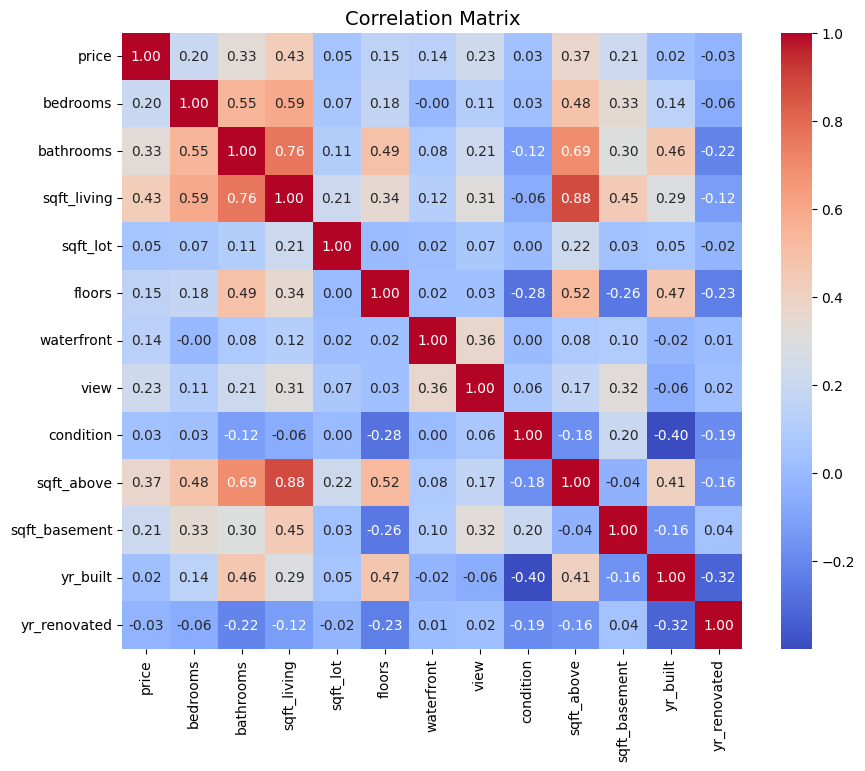

In [37]:
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=14)
plt.show()


In [38]:
print(max (df['yr_built']))
print(min (df['yr_built']))


2014
1900


In [39]:
import pandas as pd

bin_edges = [1900, 1920, 1940, 1960, 1980, 2000, 2020]

bin_labels = ['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']

df['year_built_bins'] = pd.cut(df['yr_built'], bins=bin_edges, labels=bin_labels)

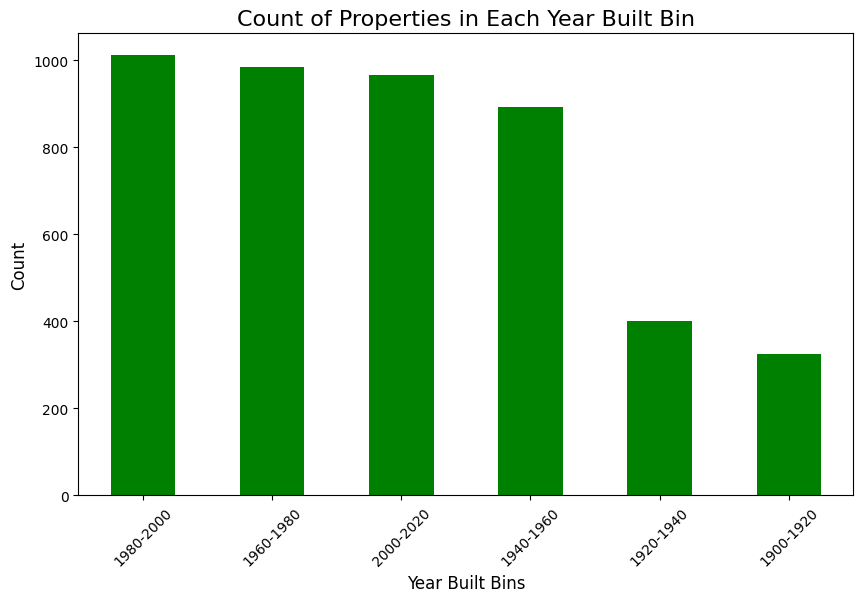

In [40]:

bin_counts = df['year_built_bins'].value_counts()


plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='green')
plt.title('Count of Properties in Each Year Built Bin', fontsize=16)
plt.xlabel('Year Built Bins', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [41]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with the 'sqft_above' attribute

# Calculate the mean of 'sqft_above'
mean_sqft_above = df['sqft_above'].mean()

# Define the bin edges using the mean
bin_edges = [mean_sqft_above - 500, mean_sqft_above - 250, mean_sqft_above, mean_sqft_above + 250, mean_sqft_above + 500]

# Define bin labels
bin_labels = ['Relatively Small House', 'Small House', 'Big House', 'V.Big House']


df['sqft_above_bin'] = pd.cut(df['sqft_above'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Now, df['sqft_above_bins'] contains the categorical values representing the bins based on mean values


In [42]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year_built_bins,sqft_above_bin
0,02-05-2014 0:00,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,1940-1960,Relatively Small House
1,02-05-2014 0:00,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,1920-1940,NaN
2,02-05-2014 0:00,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,1960-1980,Big House
3,02-05-2014 0:00,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,1960-1980,NaN
4,02-05-2014 0:00,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,1960-1980,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,09-07-2014 0:00,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,1940-1960,Relatively Small House
4596,09-07-2014 0:00,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,1980-2000,Relatively Small House
4597,09-07-2014 0:00,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,2000-2020,NaN
4598,10-07-2014 0:00,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,1960-1980,NaN


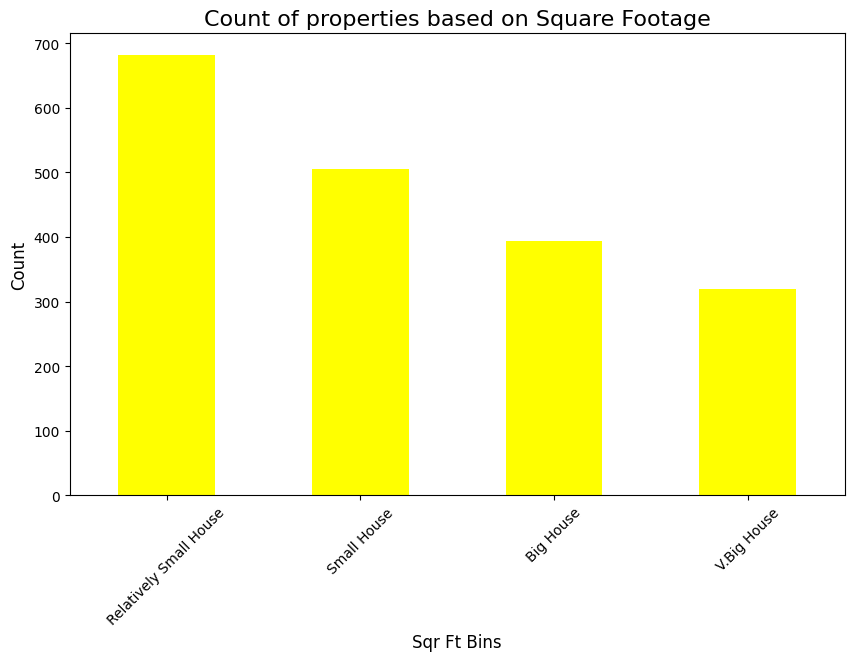

In [43]:

bin_counts = df['sqft_above_bin'].value_counts()


plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='yellow')
plt.title('Count of properties based on Square Footage', fontsize=16)
plt.xlabel('Sqr Ft Bins', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [44]:
df1 = df.copy()

In [45]:
numerical_columns = df1.select_dtypes(include=['number']).columns

print(numerical_columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')


In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[numerical_columns] = scaler.fit_transform(df1[numerical_columns])
df1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year_built_bins,sqft_above_bin
0,02-05-2014 0:00,0.011771,0.333333,0.18750,0.073652,0.006775,0.2,0.0,0.0,0.50,0.107301,0.000000,0.482456,0.995531,18810 Densmore Ave N,Shoreline,WA 98133,USA,1940-1960,Relatively Small House
1,02-05-2014 0:00,0.089658,0.555556,0.31250,0.249051,0.007835,0.4,0.0,1.0,1.00,0.331858,0.058091,0.184211,0.000000,709 W Blaine St,Seattle,WA 98119,USA,1920-1940,NaN
2,02-05-2014 0:00,0.012862,0.333333,0.25000,0.118451,0.010534,0.0,0.0,0.0,0.75,0.172566,0.000000,0.578947,0.000000,26206-26214 143rd Ave SE,Kent,WA 98042,USA,1960-1980,Big House
3,02-05-2014 0:00,0.015795,0.333333,0.28125,0.123766,0.006885,0.0,0.0,0.0,0.75,0.069690,0.207469,0.552632,0.000000,857 170th Pl NE,Bellevue,WA 98008,USA,1960-1980,NaN
4,02-05-2014 0:00,0.020684,0.444444,0.31250,0.119210,0.009186,0.0,0.0,0.0,0.75,0.085177,0.165975,0.666667,0.989076,9105 170th Ave NE,Redmond,WA 98052,USA,1960-1980,NaN


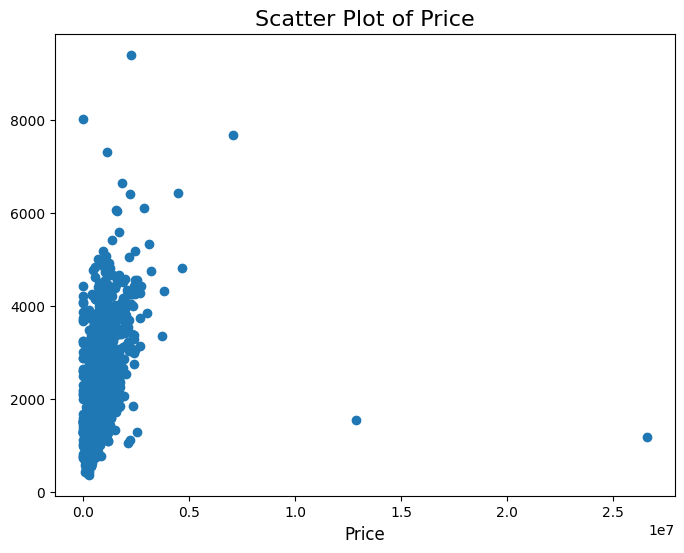

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(df['price'],df['sqft_above'])
plt.title('Scatter Plot of Price', fontsize=16)
plt.xlabel('Price', fontsize=12)

plt.show()

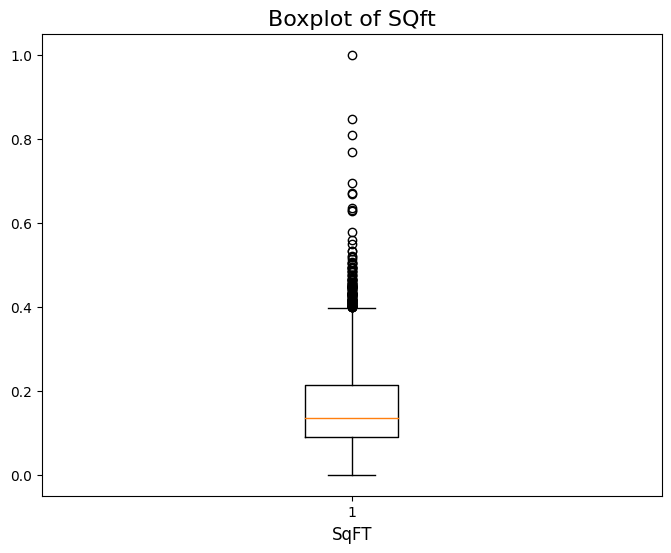

In [48]:
plt.figure(figsize=(8, 6))
plt.boxplot(df1['sqft_above'])  # vert=False to create a horizontal boxplot
plt.title('Boxplot of SQft', fontsize=16)
plt.xlabel('SqFT', fontsize=12)

# Show the plot
plt.show()

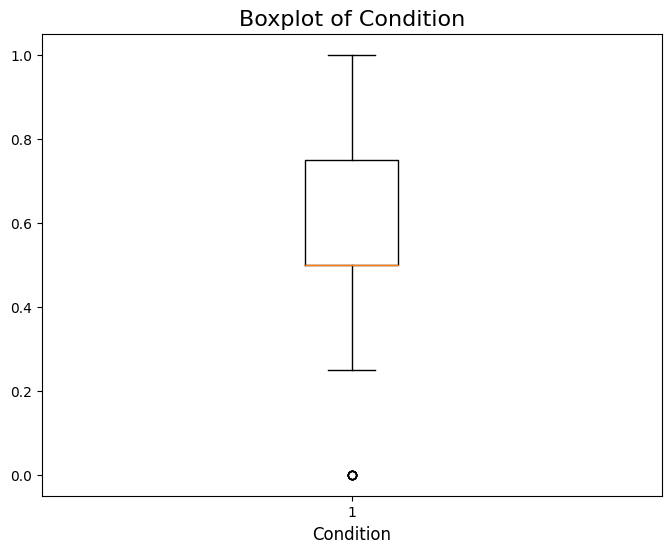

In [49]:
plt.figure(figsize=(8, 6))
plt.boxplot(df1['condition'])  # vert=False to create a horizontal boxplot
plt.title('Boxplot of Condition', fontsize=16)
plt.xlabel('Condition', fontsize=12)

# Show the plot
plt.show()

**APPLYING Z-SCORE**

In [50]:
df2 = df.copy()

In [51]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df2[numerical_columns] = scaler.fit_transform(df2[numerical_columns])
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year_built_bins,sqft_above_bin
0,02-05-2014 0:00,-0.423864,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464,-0.531014,1.221670,18810 Densmore Ave N,Shoreline,WA 98133,USA,1940-1960,Relatively Small House
1,02-05-2014 0:00,3.249598,1.759705,0.432802,1.568528,-0.161718,0.906555,-0.085004,4.830079,2.286416,1.789559,-0.069128,-1.674693,-0.825693,709 W Blaine St,Seattle,WA 98119,USA,1920-1940,NaN
2,02-05-2014 0:00,-0.372424,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,-0.085004,-0.309194,0.809652,0.119171,-0.672464,-0.161000,-0.825693,26206-26214 143rd Ave SE,Kent,WA 98042,USA,1960-1980,Big House
3,02-05-2014 0:00,-0.234071,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,-0.309194,0.809652,-0.959621,1.482306,-0.261913,-0.825693,857 170th Pl NE,Bellevue,WA 98008,USA,1960-1980,NaN
4,02-05-2014 0:00,-0.003482,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,-0.309194,0.809652,-0.797222,1.051352,0.175376,1.208396,9105 170th Ave NE,Redmond,WA 98052,USA,1960-1980,NaN


*Visualization of Min-Max and ZScore Normalization*

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data= scaler.fit_transform(df2[numerical_columns])


In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
minmax_data = scaler.fit_transform(df2[numerical_columns])


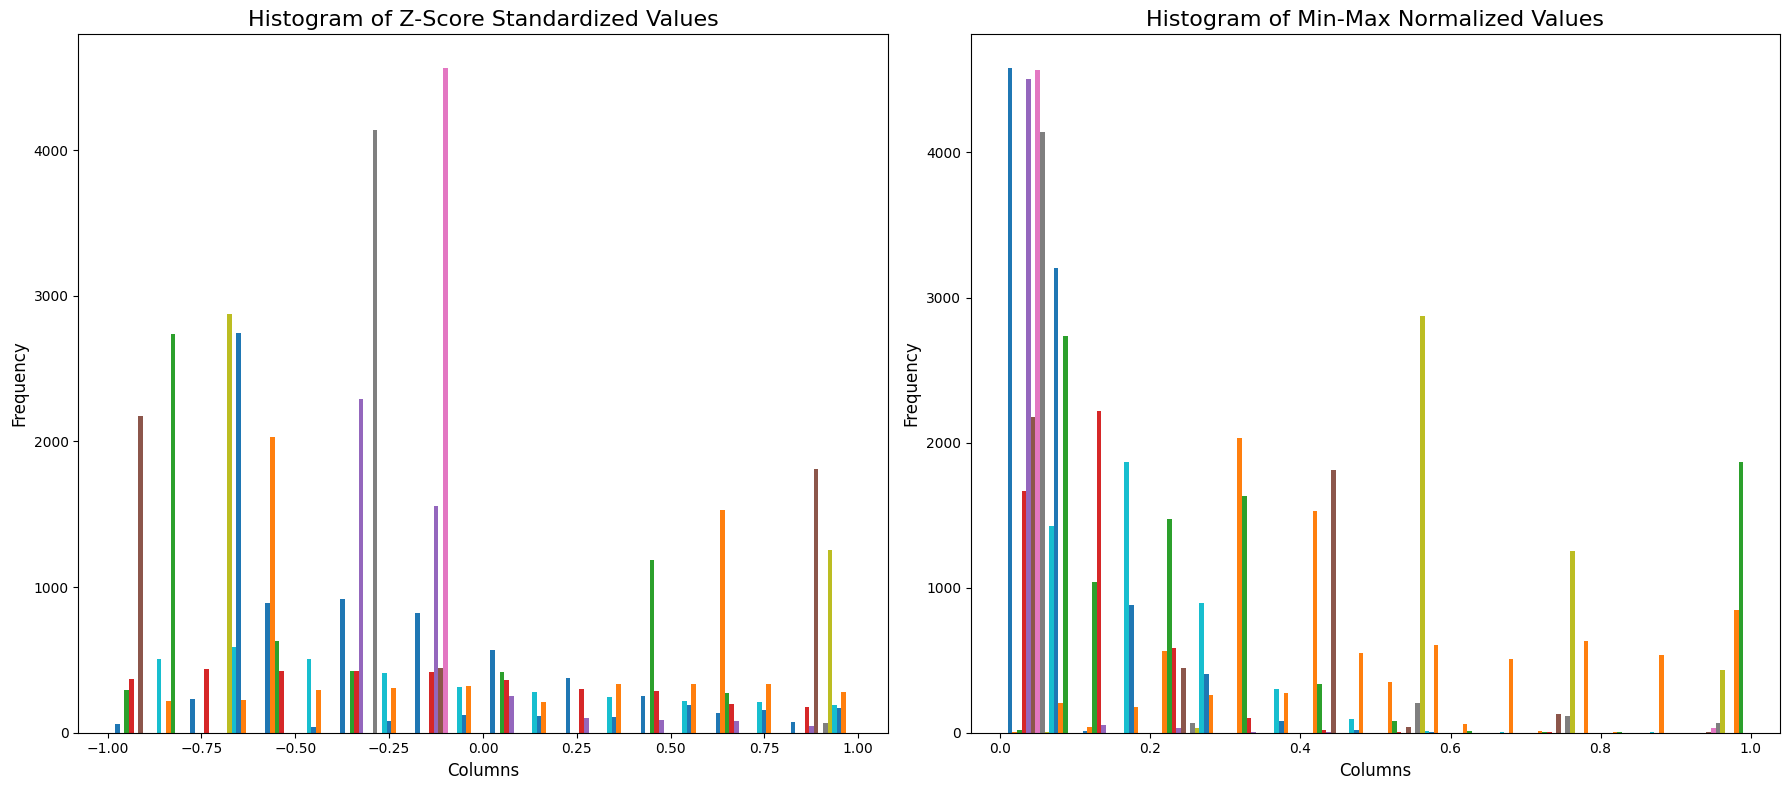

In [57]:
# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot the Z-score standardized data
axes[0].hist(standardized_data, bins=10, range=(-1, 1))
axes[0].set_title('Histogram of Z-Score Standardized Values', fontsize=16)
axes[0].set_xlabel('Columns', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Plot the Min-Max normalized data
axes[1].hist(minmax_data, bins=10)
axes[1].set_title('Histogram of Min-Max Normalized Values', fontsize=16)
axes[1].set_xlabel('Columns', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

# Show the plots
plt.tight_layout()
plt.show()